Load Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#TEST_IMAGE_DIR = "./dog-breed-identification/test/"
TRAIN_IMAGE_DIR = "./dog-breed-identification/train/"
LABELS = './dog-breed-identification/labels.csv'

data = pd.read_csv(LABELS)
class_names = data['breed'].unique()

print(data)

2023-04-29 18:01:48.695732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                     id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]


In [3]:
#Data from the csv only contans the ids of the photos and not the photos itself
#Iterate through the data and check whether the photo is in test or train
#Then fetch it and store it in its proper variable
import tensorflow as tf
from os.path import join
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img).flatten() for img in imgs])
    output =  preprocess_input(img_array)
    return(output)

imagepaths = [join(TRAIN_IMAGE_DIR, filename + ".jpg") for filename in data["id"]]

images = read_and_prep_images(imagepaths)

# Get image IDs for train and test
labels = data['breed'].values
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, random_state=42, stratify=encoded_labels)

Create the Train and Test Variables

In [4]:
#Method that will show you the picture from the given matrix
def showImage(imageMatrix):
    image = Image.fromarray(imageMatrix)
    image.show()

Create The Decision Tree Model

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf  = DecisionTreeClassifier(random_state=42, max_depth=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [6]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_train)
accuracy= accuracy_score(y_train, y_pred)
print(accuracy)

y_pred = clf.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)

0.07645003494060097
0.021193348549070755


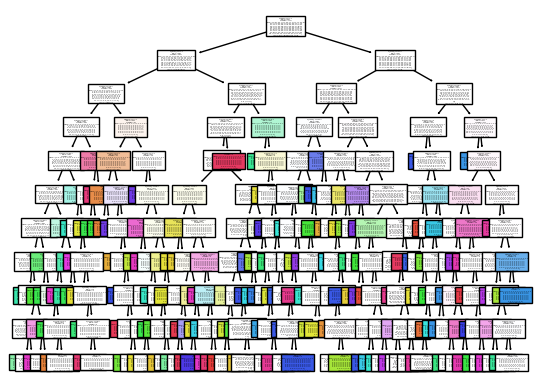

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(clf, class_names=class_names, filled=True)
plt.show()

In [14]:
def predicted_label(image):
    pred = clf.predict(image)
    return label_encoder.inverse_transform(pred)

print(predicted_label([x_test[5]]))

['siberian_husky']


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision_score from our model: %s' % (precision_score(y_test, y_pred, average="micro")))
print('recall_score from our model: %s' % (recall_score(y_test, y_pred, average="micro")))
print('f1_score from our model: %s' % (f1_score(y_test, y_pred, average="micro")))

3067
3067
precision_score from our model: 0.018910987936093904
recall_score from our model: 0.018910987936093904
f1_score from our model: 0.018910987936093904
